### Import libraries

In [29]:
from scipy.stats import norm
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.stats import kurtosis, skew
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.externals import joblib

import time
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import statistics
import pprint
import sys

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
news_df = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
# shredding the whitespaces in the dataset columns
columns = [col.strip() for col in news_df.columns]
news_df.columns = columns

In [11]:
# changing the continuous target class to binary
news_df.loc[news_df['shares'] < 1500, 'shares'] = 0
news_df.loc[news_df['shares'] >= 1500, 'shares'] = 1

In [12]:
# removing the 'url' and 'timedelta' column as they are non-predictive
news_df.drop(['url', 'timedelta'], axis=1, inplace=True)

In [13]:
# adding a new column for weekday in the news_df using temp variable
temp = news_df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday']]
temp['is_weekday'] = np.NaN

# changing the is_weekday as per weekday values
for index, row in temp.iterrows():
    if (row['weekday_is_monday'] == 1.0 or row['weekday_is_tuesday'] == 1.0 or row['weekday_is_wednesday'] == 1.0 or row['weekday_is_thursday'] == 1.0 or row['weekday_is_friday'] == 1.0):
        row['is_weekday'] = 1.0

# indices of the empty rows
# np.argwhere(np.isnan(temp['is_weekday']))

# total number of null/empty values in dataframe
# temp.isna().sum()

# fill the empty values with 0
temp['is_weekday'].fillna(0.0, inplace=True)

# assigning the temp variable to the news_df
news_df['is_weekday'] = temp['is_weekday']

# dropping the separated days column
news_df.drop(['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday','weekday_is_sunday','weekday_is_saturday'], axis=1, inplace=True)

# news_df['is_weekday'].value_counts()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
# drop unimportant columns
news_df = news_df.drop(['n_non_stop_words', 'n_unique_tokens', 'num_videos', 'n_non_stop_unique_tokens',
'kw_min_max', 'data_channel_is_lifestyle', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',
'data_channel_is_entertainment', 'data_channel_is_bus', 'self_reference_min_shares', 'self_reference_max_shares',
'avg_negative_polarity', 'min_positive_polarity', 'avg_positive_polarity', 'max_positive_polarity',
'min_negative_polarity', 'max_negative_polarity', 'abs_title_subjectivity'], axis=1)

In [15]:
# putting the dataframe in X and splitting in test-train
y = news_df['shares']
news_df.drop(['shares'], axis=1, inplace=True)
X = news_df.copy(deep=True)
# scaling the values between the range 0 to 1
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
# Divide in test train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Model fitting with Baseline models

In [16]:
# cross validation (n=10)
cv_kfold = KFold(n_splits=10, random_state=None, shuffle=False)

In [38]:
# Linear model
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
y_pred = log_classifier.predict(X_test)
# print('Linear SVC score: {}' .format(linear_svc_classifier.score(X_test, y_test)))
# calculating final score using cross validation (n=10)
results = cross_val_score(log_classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.61634163 0.63853396 0.63819771 0.63437605 0.64177598 0.63202153
 0.63134881 0.63841238 0.63303061 0.64614867]
Accuracy: 63.50%
[[3275 1798]
 [1865 2973]]
0.6304106548279689
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      5073
           1       0.62      0.61      0.62      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



In [40]:
# Tree based model
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(tree_classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.57027572 0.56758574 0.55884331 0.58324924 0.5835856  0.56138581
 0.56844938 0.56239489 0.5835856  0.58291288]
Accuracy: 57.22%
[[2885 2188]
 [2096 2742]]
0.5677530017152659
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      5073
           1       0.56      0.57      0.56      4838

    accuracy                           0.57      9911
   macro avg       0.57      0.57      0.57      9911
weighted avg       0.57      0.57      0.57      9911



In [42]:
# Rule‐based model
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.48856759 0.48789509 0.50067249 0.50016818 0.49781366 0.48368651
 0.50218634 0.48234107 0.50992264 0.48772284]
Accuracy: 49.41%
[[2597 2476]
 [2398 2440]]
0.5082231863585914
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      5073
           1       0.50      0.50      0.50      4838

    accuracy                           0.51      9911
   macro avg       0.51      0.51      0.51      9911
weighted avg       0.51      0.51      0.51      9911



In [44]:
# Probabilistic model (Naïve Bayesian)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(nb_classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.59381305 0.61163416 0.60087424 0.58661285 0.60713084 0.58997645
 0.60309452 0.59737639 0.5946855  0.61385806]
Accuracy: 59.99%
[[3438 1635]
 [2326 2512]]
0.6003430531732419
              precision    recall  f1-score   support

           0       0.60      0.68      0.63      5073
           1       0.61      0.52      0.56      4838

    accuracy                           0.60      9911
   macro avg       0.60      0.60      0.60      9911
weighted avg       0.60      0.60      0.60      9911



In [46]:
# Distance based model
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# calculating final score using cross validation (n=10)
results = cross_val_score(classifier, X_train, y_train, cv=cv_kfold)
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.57767317 0.58809684 0.58776059 0.59502186 0.5691221  0.58459469
 0.58694921 0.58560377 0.58896737 0.57214934]
Accuracy: 58.36%
[[3085 1988]
 [2120 2718]]
0.5855110483301382
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      5073
           1       0.58      0.56      0.57      4838

    accuracy                           0.59      9911
   macro avg       0.59      0.58      0.58      9911
weighted avg       0.59      0.59      0.59      9911



### Model fitting with Ensembles

In [22]:
# Ref- https://scikit-learn.org/stable/modules/ensemble.html
# Random forest
rf_classifier = RandomForestClassifier(n_estimators=15)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# calculating final score using cross validation (n=10)
rf_results = cross_val_score(rf_classifier, X_train, y_train, cv=cv_kfold)
print(rf_results)
print("Accuracy: %.2f%%" % (rf_results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.60726295 0.61667787 0.62508406 0.62361251 0.63067608 0.61083081
 0.62058527 0.62159435 0.63067608 0.65321224]
Accuracy: 62.40%
[[3202 1871]
 [1820 3018]]
0.6275855110483302
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      5073
           1       0.62      0.62      0.62      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



In [28]:
# Gradient boost
gradient_classifier = GradientBoostingClassifier()
gradient_classifier.fit(X_train, y_train)
y_pred = gradient_classifier.predict(X_test)
# calculating final score using cross validation (n=10)
gradient_results = cross_val_score(gradient_classifier, X_train, y_train, cv=cv_kfold)
print(gradient_results)
print("Accuracy: %.2f%%" % (gradient_results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.65400134 0.65030262 0.65770007 0.66162126 0.65220316 0.65691221
 0.65253952 0.65253952 0.65724857 0.6646485 ]
Accuracy: 65.60%
[[3323 1750]
 [1699 3139]]
0.6520028251437796
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      5073
           1       0.64      0.65      0.65      4838

    accuracy                           0.65      9911
   macro avg       0.65      0.65      0.65      9911
weighted avg       0.65      0.65      0.65      9911



In [49]:
# Voting classifier
# creating a dictionary and add desired models
models = [('rf', rf_classifier), ('Gradient', gradient_classifier), ('Multinomial', nb_classifier)]

# creating the voting classifier and inputting the models
custom_ensemble = VotingClassifier(models, voting='hard')
custom_ensemble.fit(X_train, y_train)
custom_ensemble.score(X_test, y_test)
y_pred = custom_ensemble.predict(X_test)
# calculating final score using cross validation (n=10)
voting_results = cross_val_score(custom_ensemble, X_train, y_train, cv=cv_kfold)
print(voting_results)
print("Accuracy: %.2f%%" % (voting_results.mean()*100))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# minority class recall and precision
print(classification_report(y_test, y_pred))

[0.65097512 0.64525891 0.65702757 0.64009418 0.64783047 0.64244871
 0.64917592 0.64547595 0.64715775 0.65825765]
Accuracy: 64.84%
[[3374 1699]
 [1836 3002]]
0.6433255978206034
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5073
           1       0.64      0.62      0.63      4838

    accuracy                           0.64      9911
   macro avg       0.64      0.64      0.64      9911
weighted avg       0.64      0.64      0.64      9911



In [37]:
# saving the classifiers 10 fold results so we do not run it again
filepath1 = r'C:\Users\Admin\Documents\uOttawa courses\ML\Project\Saved_Models\LR'
filepath2 = r'C:\Users\Admin\Documents\uOttawa courses\ML\Project\Saved_Models\GR'
filepath3 = r'C:\Users\Admin\Documents\uOttawa courses\ML\Project\Saved_Models\VO'
joblib.dump(rf_results, filepath1)
joblib.dump(gradient_results, filepath2)
joblib.dump(voting_results, filepath3)

['C:\\Users\\Admin\\Documents\\uOttawa courses\\ML\\Project\\Saved_Models\\VO']

### ROC-AUC

AUC = 0.6300423694180712


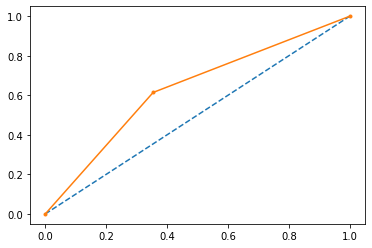

In [39]:
# ROC for linear logistic model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

AUC = 0.5677300743579456


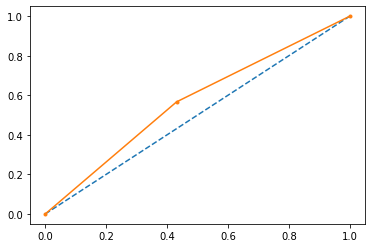

In [41]:
# ROC for linear Decision tree model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

AUC = 0.508133259373869


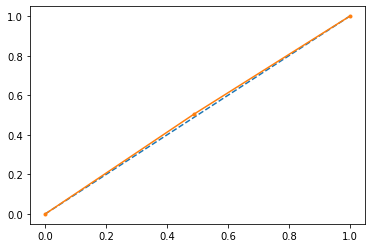

In [43]:
# ROC for linear Dummy rule based model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

AUC = 0.5984641595255773


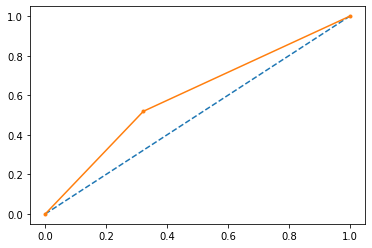

In [45]:
# ROC for linear MultinomialNB model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

AUC = 0.584961912424204


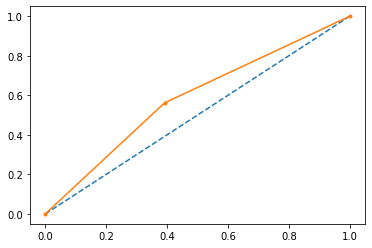

In [47]:
# ROC for linear KNN model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

AUC = 0.584961912424204


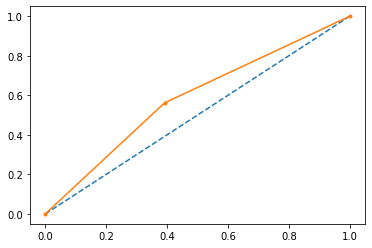

In [48]:
# ROC for linear Random forest model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

AUC = 0.6519291473873754


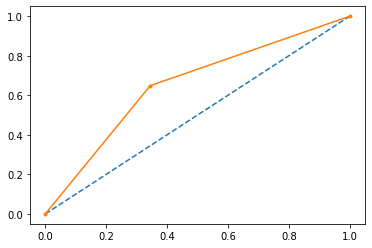

In [30]:
# ROC for Gradient boost model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

AUC = 0.6427970155775289


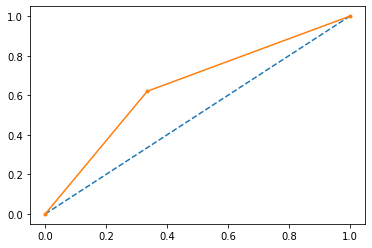

In [50]:
# ROC for Voting classifier model
# calculating FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# calculating Area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC = " + str(auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()